# Laptop Price Prediction

The dataset contains information about different laptop models, their configurations, and corresponding prices.

##### Importing Required Packages

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_column', 100)

##### Importing Data


In [216]:
df = pd.read_csv('laptop_data.csv')

## EDA - Exploratory Data Analysis 

In [217]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [218]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [220]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [221]:
df.value_counts()

Unnamed: 0  Company  TypeName     Inches  ScreenResolution                    Cpu                                   Ram   Memory              Gpu                           OpSys       Weight  Price      
0           Apple    Ultrabook    13.3    IPS Panel Retina Display 2560x1600  Intel Core i5 2.3GHz                  8GB   128GB SSD           Intel Iris Plus Graphics 640  macOS       1.37kg  71378.6832     1
856         Asus     Notebook     15.6    1366x768                            Intel Pentium Quad Core N4200 1.1GHz  4GB   1TB HDD             Intel HD Graphics 505         Windows 10  2kg     23922.7200     1
874         Samsung  Ultrabook    15.0    Full HD 1920x1080                   Intel Core i7 7500U 2.7GHz            16GB  256GB SSD           Nvidia GeForce 940MX          Windows 10  1.23kg  98514.7200     1
873         Lenovo   Notebook     13.3    IPS Panel Full HD 1920x1080         Intel Core i3 7100U 2.4GHz            4GB   180GB SSD           Intel HD Graphics 620      

In [222]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [223]:
# Since most values are objects, we may not accurate information about the data.
# So we should convert the object values to numeric values before

## Feature Engineering 

In [224]:
# move the Price column to the 1st row
cols = df.columns.tolist()  
price_index = cols.index('Price')
new_cols = [cols[price_index]] + cols[:price_index] + cols[price_index+1:]
df = df[new_cols] 

In [225]:
df.Ram.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [226]:
# we can see that the Ram column has 'GB' in the values, we should remove it and convert the values to int
df.Ram = df.Ram.str.replace('GB','').astype('Int64')

In [227]:
df.Ram.unique()

<IntegerArray>
[8, 16, 4, 2, 12, 6, 32, 24, 64]
Length: 9, dtype: Int64

In [228]:
df.Weight.unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [229]:
# We drop corrupted data
df = df[df['Weight'] != '1TB']

In [230]:
# we can see that the Weight column has 'kg' in the values, we should remove it and convert the values to float

df.Weight = df.Weight.str.replace('kg','').astype(float)
df.Weight.unique()

array([1.37 , 1.34 , 1.86 , 1.83 , 2.1  , 2.04 , 1.3  , 1.6  , 2.2  ,
       0.92 , 1.22 , 0.98 , 2.5  , 1.62 , 1.91 , 2.3  , 1.35 , 1.88 ,
       1.89 , 1.65 , 2.71 , 1.2  , 1.44 , 2.8  , 2.   , 2.65 , 2.77 ,
       3.2  , 0.69 , 1.49 , 2.4  , 2.13 , 2.43 , 1.7  , 1.4  , 1.8  ,
       1.9  , 3.   , 1.252, 2.7  , 2.02 , 1.63 , 1.96 , 1.21 , 2.45 ,
       1.25 , 1.5  , 2.62 , 1.38 , 1.58 , 1.85 , 1.23 , 1.26 , 2.16 ,
       2.36 , 2.05 , 1.32 , 1.75 , 0.97 , 2.9  , 2.56 , 1.48 , 1.74 ,
       1.1  , 1.56 , 2.03 , 1.05 , 4.4  , 1.29 , 1.95 , 2.06 , 1.12 ,
       1.42 , 3.49 , 3.35 , 2.23 , 4.42 , 2.69 , 2.37 , 4.7  , 3.6  ,
       2.08 , 4.3  , 1.68 , 1.41 , 4.14 , 2.18 , 2.24 , 2.67 , 2.14 ,
       1.36 , 2.25 , 2.15 , 2.19 , 2.54 , 3.42 , 1.28 , 2.33 , 1.45 ,
       2.79 , 1.84 , 2.6  , 2.26 , 3.25 , 1.59 , 1.13 , 1.78 , 1.15 ,
       1.27 , 1.43 , 2.31 , 1.16 , 1.64 , 2.17 , 1.47 , 3.78 , 1.79 ,
       0.91 , 1.99 , 4.33 , 1.93 , 1.87 , 2.63 , 3.4  , 3.14 , 1.94 ,
       1.24 , 4.6  ,

In [231]:
df.Cpu.nunique()

118

In [232]:
df.Gpu.nunique()

110

In [233]:
df.Memory.nunique()

39

In [234]:
df.ScreenResolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [235]:
df.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [236]:
# we divide the Memory column into two: MemorySize and MemoryType.
# first we need to divide Memoty colum into 2 like Memory1 and Memory2 . beacuse some laptops have 2 memory types
df['Memory'] = df['Memory'].str.replace('Flash Storage', 'Flash_Storage')
df[['Memory1', 'Memory2']] = df['Memory'].str.split('+', expand=True)

In [237]:
#values ​​are the same, we simplify them#
df['Memory1'].nunique()

30

In [238]:
df.Memory1 = df.Memory1.str.strip()
df.Memory1.nunique()

24

In [239]:
df.Memory2 = df.Memory2.str.strip()
df.Memory2.unique()


array([None, '1TB HDD', '256GB SSD', '2TB HDD', '500GB HDD', '512GB SSD',
       '1.0TB Hybrid'], dtype=object)

In [240]:
df[['Memory1Size', 'Memory1Type']] = df['Memory1'].str.split(' ', expand=True)
df[['Memory2Size', 'Memory2Type']] = df['Memory2'].str.split(' ', expand=True)

In [241]:
df.Memory2Size.unique()


array([None, '1TB', '256GB', '2TB', '500GB', '512GB', '1.0TB'],
      dtype=object)

In [242]:
# Convert TB to GB
def convert_tb_to_gb(storage):
    if storage == None:
        return None
    if 'TB' in storage:
        num = float(storage.split('TB')[0].replace(' ', '')) * 1000
        storage = f'{int(num)}GB' + storage.split('TB')[1]
    return storage

df['Memory1Size'] = df['Memory1Size'].apply(convert_tb_to_gb)
df['Memory2Size'] = df['Memory2Size'].apply(convert_tb_to_gb)


In [243]:
df['Memory2Size'].unique()

array([None, '1000GB', '256GB', '2000GB', '500GB', '512GB'], dtype=object)

In [244]:
df['Memory2Size'].replace({None: np.nan}, inplace=True)
df['Memory2Type'].replace({None: np.nan}, inplace=True)

df['Memory2Size'].fillna("0GB", inplace=True)


In [245]:
df['Memory2Size'].unique()


array(['0GB', '1000GB', '256GB', '2000GB', '500GB', '512GB'], dtype=object)

In [246]:
df.Memory1Size = df.Memory1Size.str.replace('GB','').astype('int64')
df.Memory2Size = df.Memory2Size.str.replace('GB','').astype('int64')

In [247]:
# now, we can drop the Memory, Memory1 and Memory2 columns
df = df.drop(['Memory','Memory1', 'Memory2'], axis=1)

In [248]:
# and , the Unnamed: 0 column look like an index column, we can drop it
df = df.drop('Unnamed: 0', axis=1)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1303 non-null   float64
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   Int64  
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Memory1Size       1303 non-null   int64  
 11  Memory1Type       1303 non-null   object 
 12  Memory2Size       1303 non-null   int64  
 13  Memory2Type       208 non-null    object 
dtypes: Int64(1), float64(3), int64(2), object(8)
memory usage: 143.9+ KB


In [250]:
df.Ram = df.Ram.astype('int64')

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1303 non-null   float64
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Memory1Size       1303 non-null   int64  
 11  Memory1Type       1303 non-null   object 
 12  Memory2Size       1303 non-null   int64  
 13  Memory2Type       208 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 142.6+ KB


In [252]:
df.corr(numeric_only=True)

,Price,Inches,Ram,Weight,Memory1Size,Memory2Size
Price,1.000000,0.068197,0.743007,0.210370,-0.122365,0.295004
Inches,0.068197,1.000000,0.237993,0.827631,0.269511,0.386670
Ram,0.743007,0.237993,1.000000,0.383874,0.018271,0.391826
Weight,0.210370,0.827631,0.383874,1.000000,0.179962,0.479133
Memory1Size,-0.122365,0.269511,0.018271,0.179962,1.000000,-0.245546
Memory2Size,0.295004,0.386670,0.391826,0.479133,-0.245546,1.000000


In [253]:
df.OpSys.unique()    

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [254]:
df.head()

,Price,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Memory1Size,Memory1Type,Memory2Size,Memory2Type
0,71378.6832,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,128,SSD,0,NaN
1,47895.5232,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,128,Flash_Storage,0,NaN
2,30636.0000,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,256,SSD,0,NaN
3,135195.3360,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,512,SSD,0,NaN
4,96095.8080,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,256,SSD,0,NaN


<Axes: >

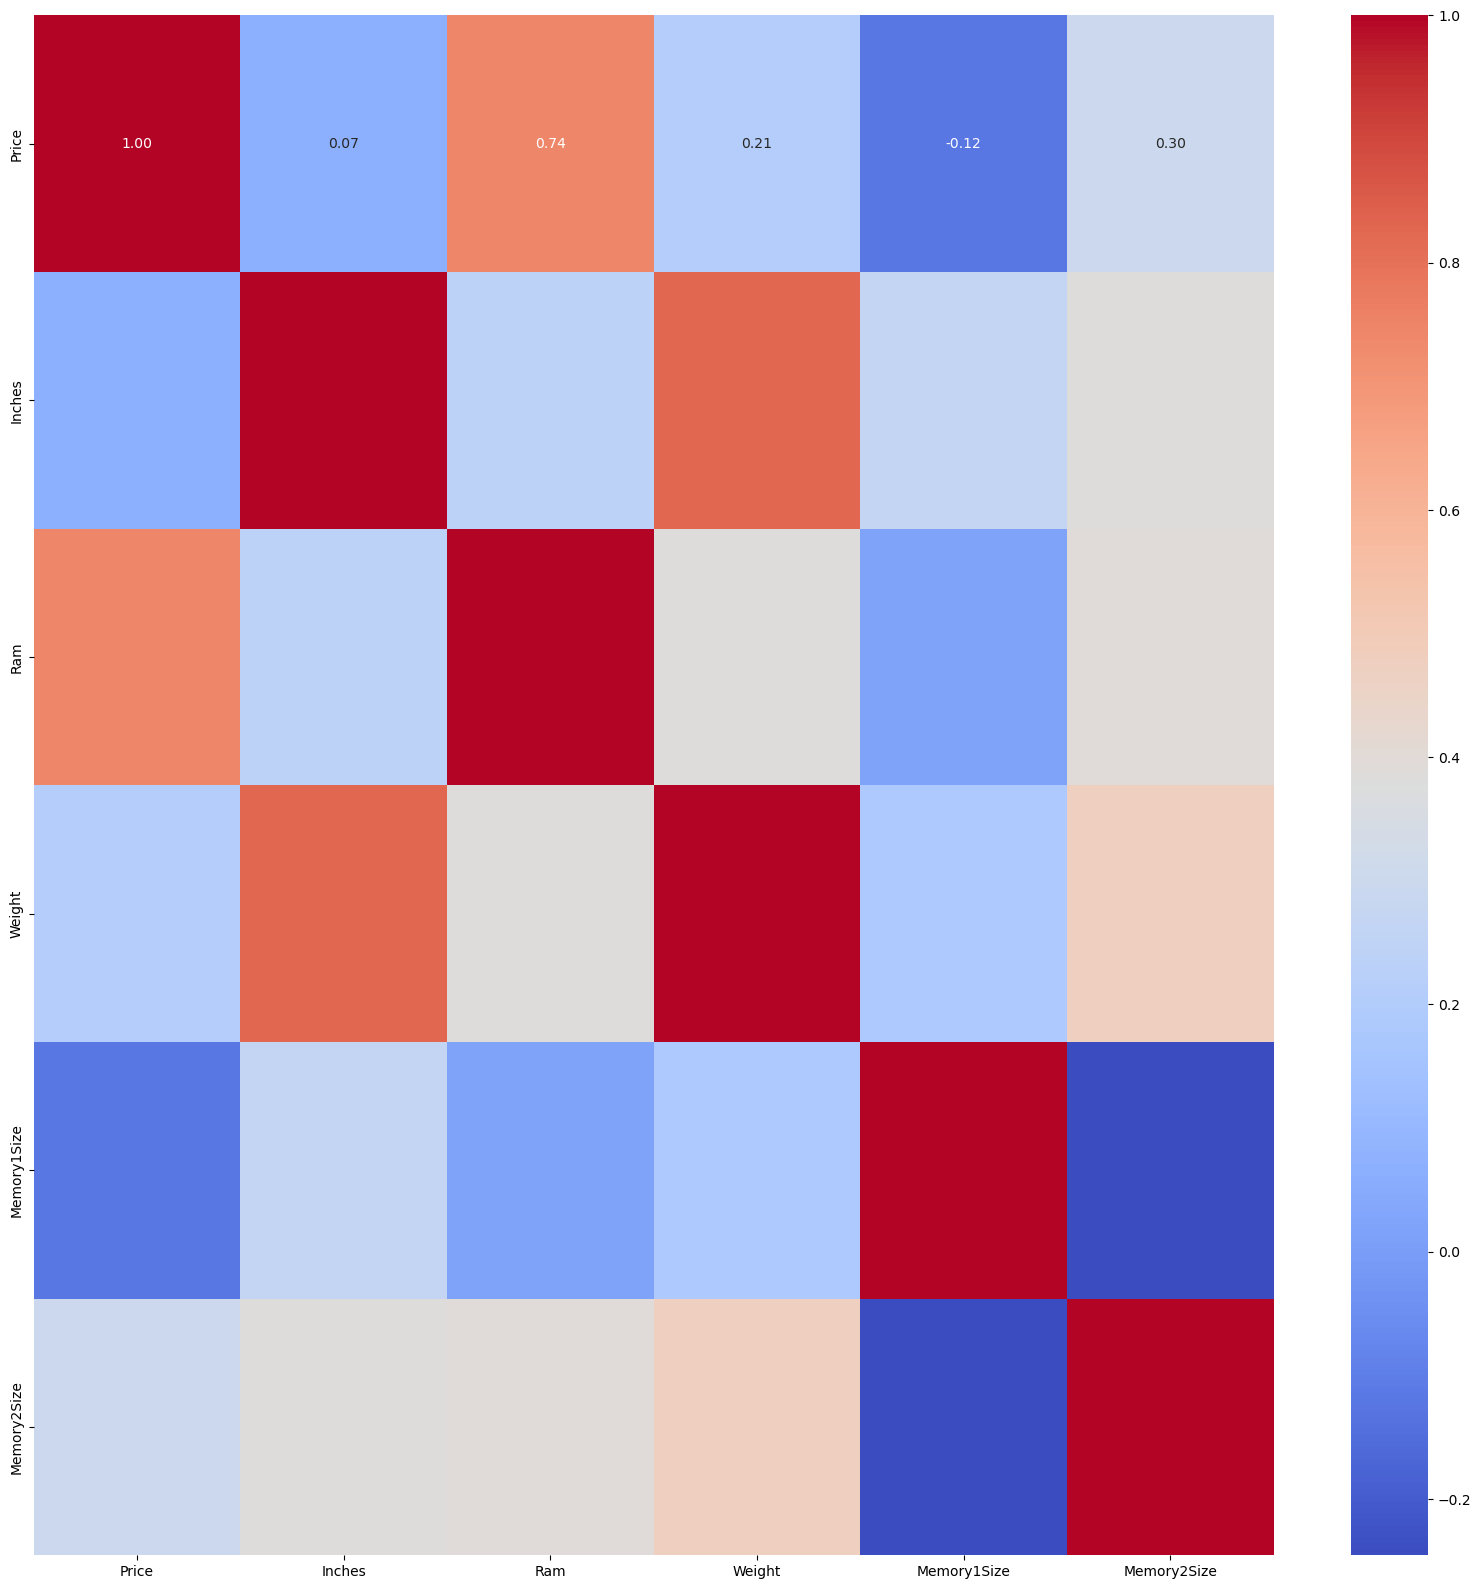

In [255]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

In [256]:
df.head()

,Price,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Memory1Size,Memory1Type,Memory2Size,Memory2Type
0,71378.6832,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,128,SSD,0,NaN
1,47895.5232,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,128,Flash_Storage,0,NaN
2,30636.0000,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,256,SSD,0,NaN
3,135195.3360,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,512,SSD,0,NaN
4,96095.8080,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,256,SSD,0,NaN


In [257]:
def corr_sort(data, column):
    return abs(data.corr(numeric_only=True)[column]).sort_values(ascending=False)

corr_sort(df, 'Price')  


Price          1.000000
Ram            0.743007
Memory2Size    0.295004
Weight         0.210370
Memory1Size    0.122365
Inches         0.068197
Name: Price, dtype: float64

In [258]:
df.describe()

,Price,Inches,Ram,Weight,Memory1Size,Memory2Size
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,59870.042910,15.017191,8.382195,2.038734,442.615503,168.288565
std,37243.201786,1.426304,5.084665,0.665475,356.225802,402.618575
min,9270.720000,10.100000,2.000000,0.690000,8.000000,0.000000
25%,31914.720000,14.000000,4.000000,1.500000,256.000000,0.000000
50%,52054.560000,15.600000,8.000000,2.040000,256.000000,0.000000
75%,79274.246400,15.600000,8.000000,2.300000,512.000000,0.000000
max,324954.720000,18.400000,64.000000,4.700000,2000.000000,2000.000000


<Axes: xlabel='Price'>

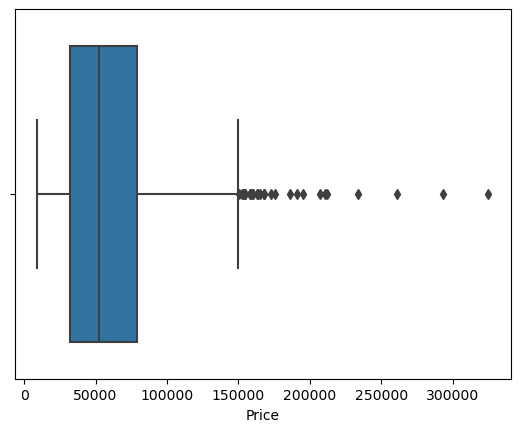

In [259]:
sns.boxplot(x='Price', data=df)

<Axes: xlabel='Price', ylabel='Count'>

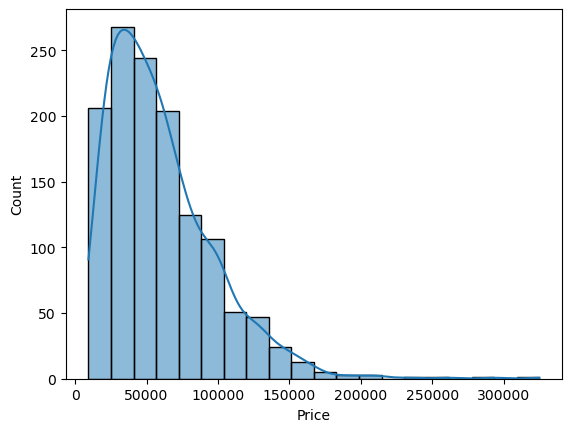

In [260]:

sns.histplot(df['Price'], kde=True, bins=20)

<Axes: >

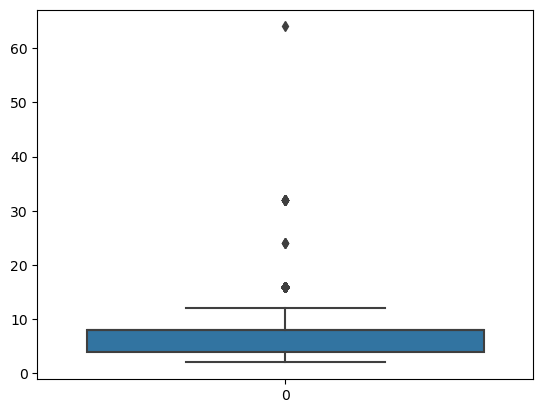

In [264]:
sns.boxplot(df['Ram'])

<Axes: xlabel='Weight', ylabel='Count'>

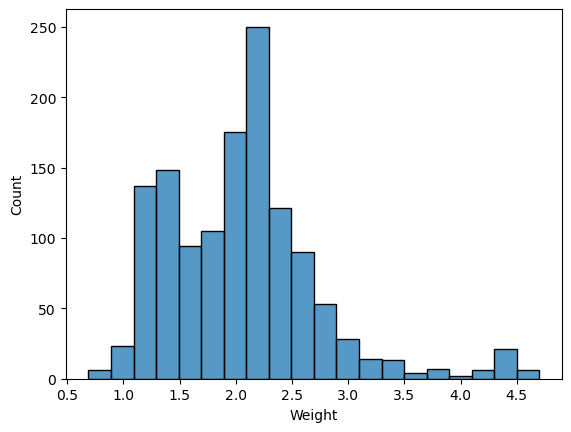

In [267]:
sns.histplot(df['Weight'], bins=20)